# Lab 1
## Simple Linear Regression
### Advertisement Data

#### Prof. Neylson Crepalde

Vamos começar estimando uma regressão linear simples para verificar se há relação entre investimento em propaganda e vendas. Comecemos investigando os dados

In [0]:
import pandas as pd
import statsmodels.formula.api as sms
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [0]:
# Lendo os dados da web
adv = pd.DataFrame.from_csv("http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv")
adv.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [0]:
# Tirando estatísticas descritivas
adv.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [0]:
# Verificando as dimensões do banco
adv.shape

(200, 4)

In [0]:
# A mesma coisa de um jeito mais metido à besta
r, c = adv.shape
print("O banco de dados possui {} linhas e {} colunas".format(r, c))

O banco de dados possui 200 linhas e 4 colunas


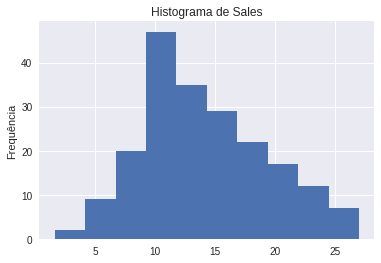

In [0]:
# Verificando a distribuição da variável resposta
plt.hist(x=adv['sales'])
plt.title("Histograma de Sales")
plt.ylabel("Frequência")
plt.show()

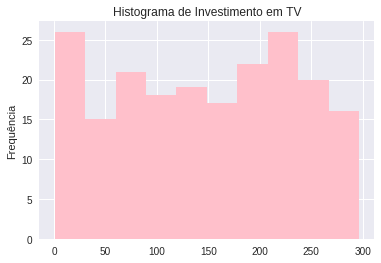

In [0]:
# Verificar a distribuição da variável TV com um histograma
plt.hist(x=adv["TV"], color="pink")
plt.title("Histograma de Investimento em TV")
plt.ylabel("Frequência")
plt.show()

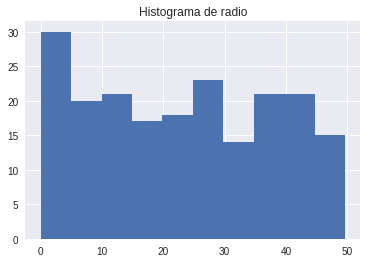

In [0]:
# Verificar a distribuição da variável radio com um histograma
plt.hist(adv.radio)
plt.title("Histograma de radio")
plt.show()

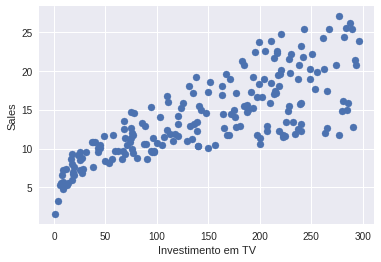

In [0]:
# Plotar um gráfico identificando a relação entre investimento em
# TV e retorno em vendas
plt.scatter(x=adv["TV"], y=adv["sales"])
plt.ylabel("Sales")
plt.xlabel("Investimento em TV")
plt.show()

In [0]:
# Montando o modelo de regressão
model = sms.ols(formula="sales ~ TV", data=adv).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 27 Feb 2019   Prob (F-statistic):           1.47e-42
Time:                        19:00:25   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

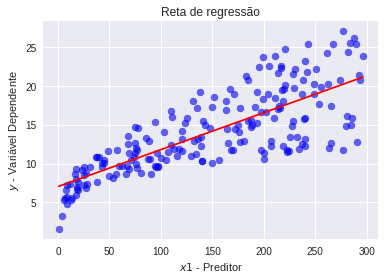

In [0]:
# Plotando a reta de regressão
plt.scatter(y=adv['sales'], x=adv['TV'], color='blue', s=50, alpha=.6)
X_plot = np.linspace(min(adv['TV']), max(adv['TV']), len(adv['TV']))
plt.plot(X_plot, X_plot*model.params[1] + model.params[0], color='r')
#plt.ylim(-11,16)
#plt.xlim(-2.5,3)
plt.title('Reta de regressão')
plt.ylabel('$y$ - Variável Dependente')
plt.xlabel('$x1$ - Preditor')
plt.show()